In [1]:
import pandas as pd
df = pd.read_csv('encoded.csv', index_col=0)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [2]:
df.date = pd.to_datetime(df.date)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [30]:
import itertools
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
#Функция Кривой ROC-AUC
def rocc(y_test,y_pred):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")
    
    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()

In [92]:
#Функция построения графика матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Обучаем модель LinearSVC на данных ДТП 2015 года

In [87]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)

C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

# Тестируем модель (15) на данных ДТП 2015 года

[[    0   643  5142]
 [    0  4254  7183]
 [    0   559 19000]]


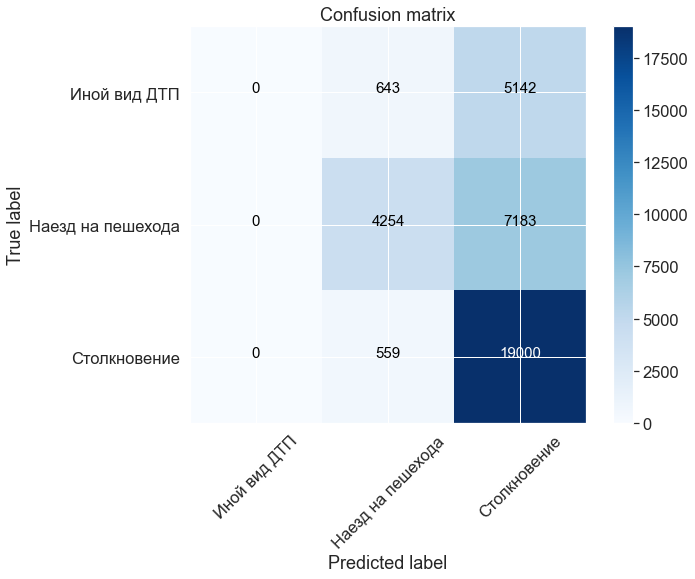

Точность модели составляет : 63.2228596286126


In [93]:
y_pred = svclassifier.predict(X_test)

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

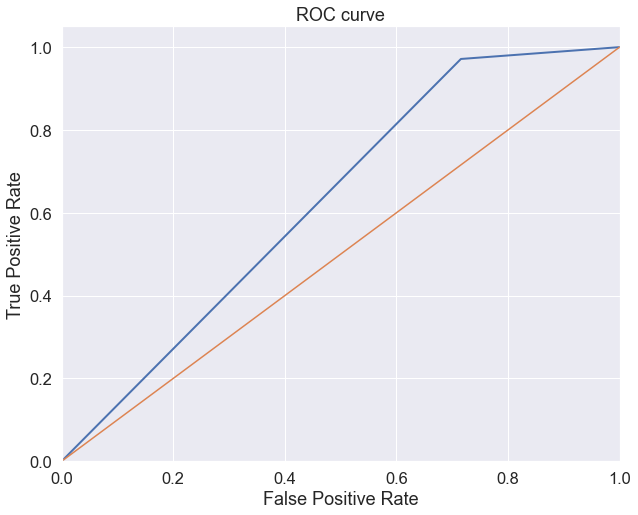

In [94]:
rocc(y_test,y_pred)

# Тестируем модель (15) на данных ДТП 2016 года

In [95]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

In [96]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)

[[    0   644  4772]
 [    0  3586  6663]
 [    0   568 18490]]


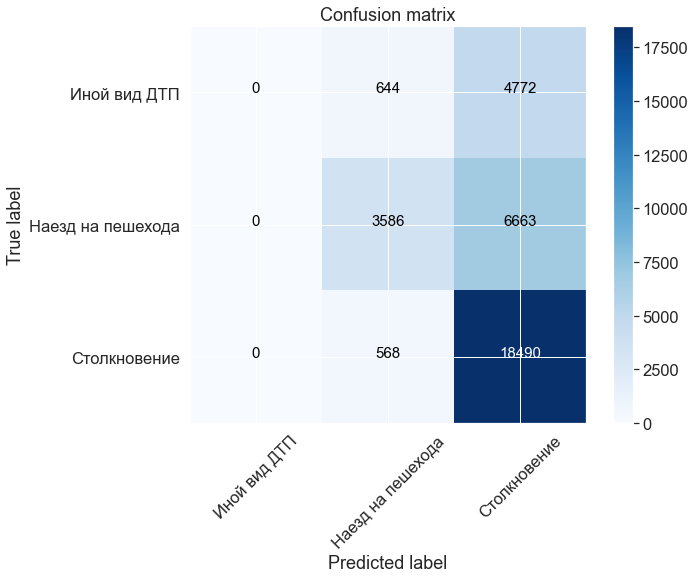

Точность модели составляет : 63.57745586498862


In [97]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

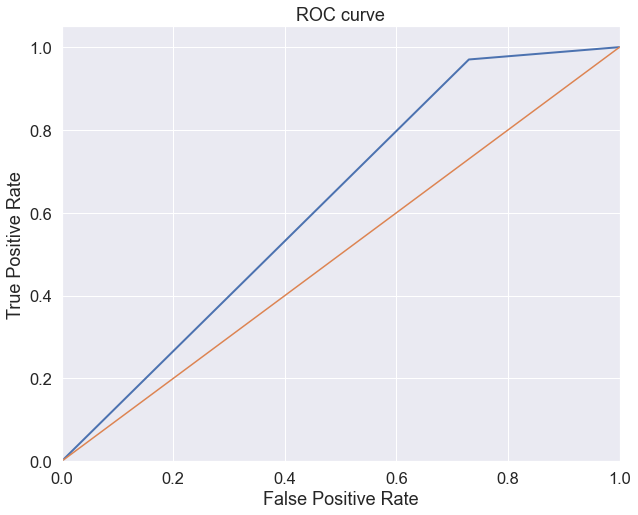

In [98]:
rocc(y1_test,y_pred)

# Тестируем модель (15) на данных ДТП 2017 года

In [99]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[    0   619  4500]
 [    0  3602  6836]
 [    0   534 17773]]


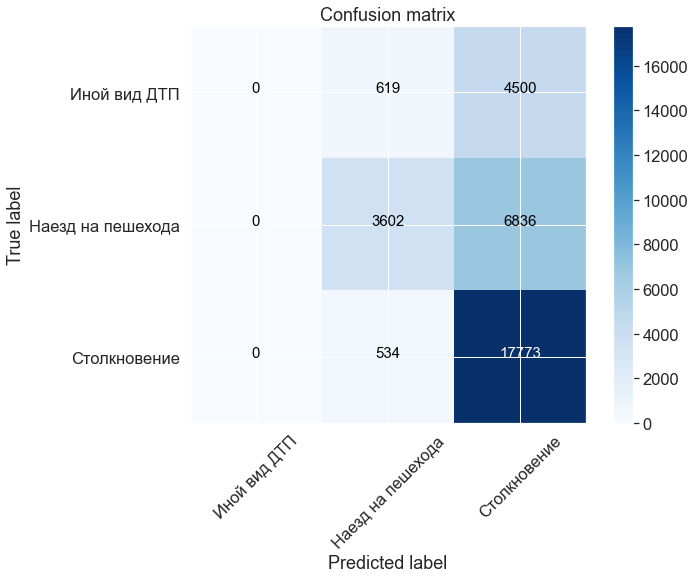

Точность модели составляет : 63.12012756909993


In [100]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Тестируем модель (15) на данных ДТП 2018 года

In [101]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']

[[    0   785  4400]
 [    0  3272  6577]
 [    0   617 17958]]


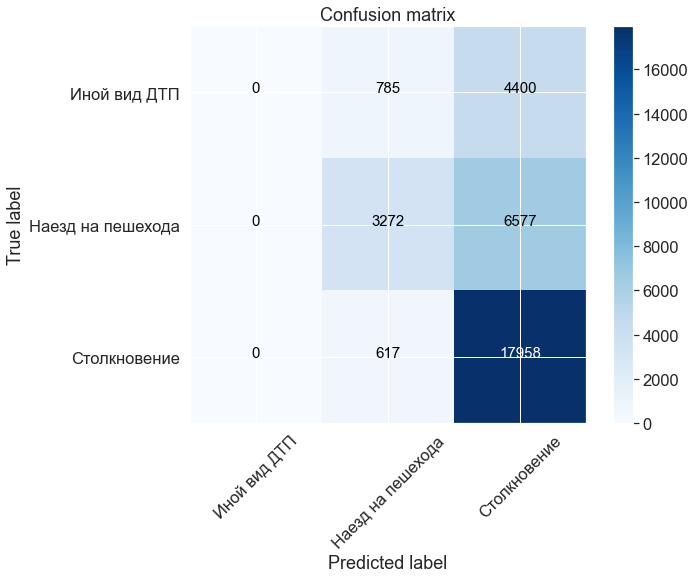

Точность модели составляет : 63.167603915617846


In [102]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Тестируем модель (15) на данных ДТП 2019 года

[[    0   560  4152]
 [    0  2478  5868]
 [    0   494 15876]]


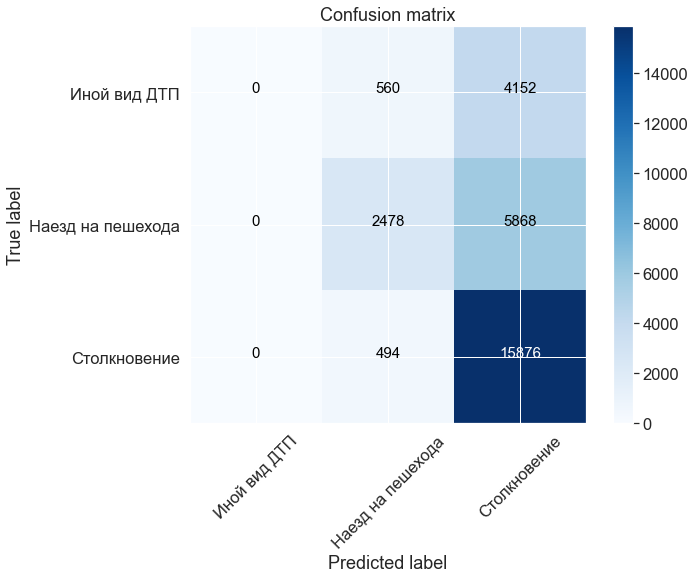

Точность модели составляет : 62.36917221693625


In [103]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Обучаем модель LinearSVC на данных ДТП 2016 года

In [104]:
dfl = df[df['date'].dt.year == 2016]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)

C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

# Тестируем модель (16) на данных ДТП 2016 года

[[    0   623  4811]
 [    0  3580  6803]
 [    0   569 18337]]


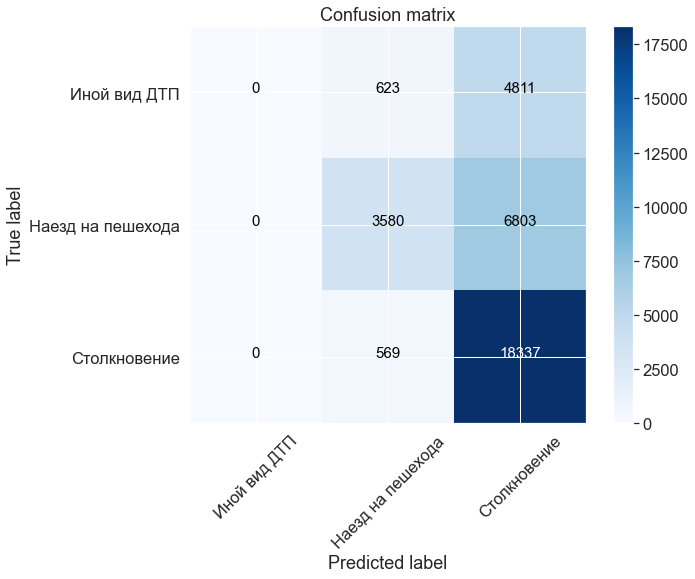

Точность модели составляет : 63.11954612216686


In [105]:
y_pred = svclassifier.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Тестируем модель (16) на данных ДТП 2017 года

[[    0   648  4472]
 [    0  3535  6938]
 [    0   559 17712]]


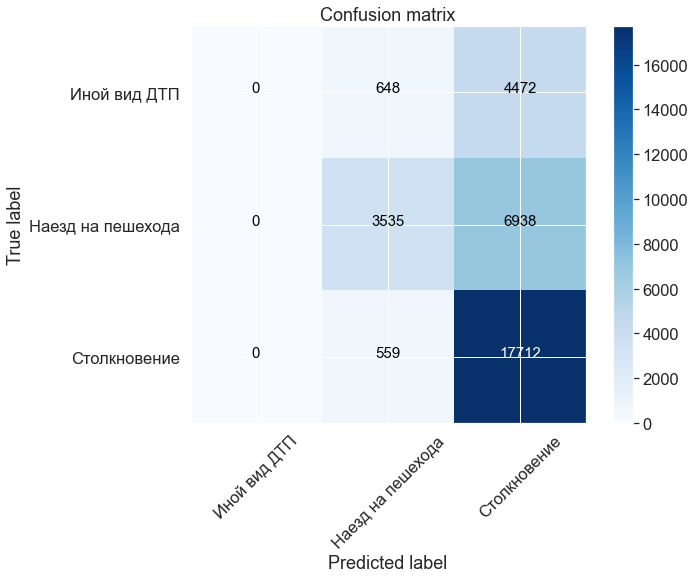

Точность модели составляет : 62.7421450507914


In [106]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Тестируем модель (16) на данных ДТП 2018 года

[[    0   768  4399]
 [    0  3113  6572]
 [    0   607 18150]]


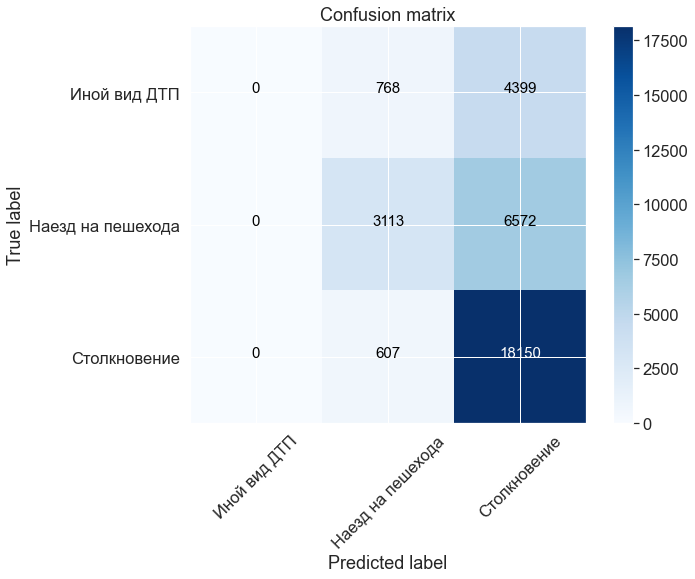

Точность модели составляет : 63.265791900978904


In [107]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Тестируем модель (16) на данных ДТП 2019 года

[[    0   558  4061]
 [    0  2486  5799]
 [    0   491 16033]]


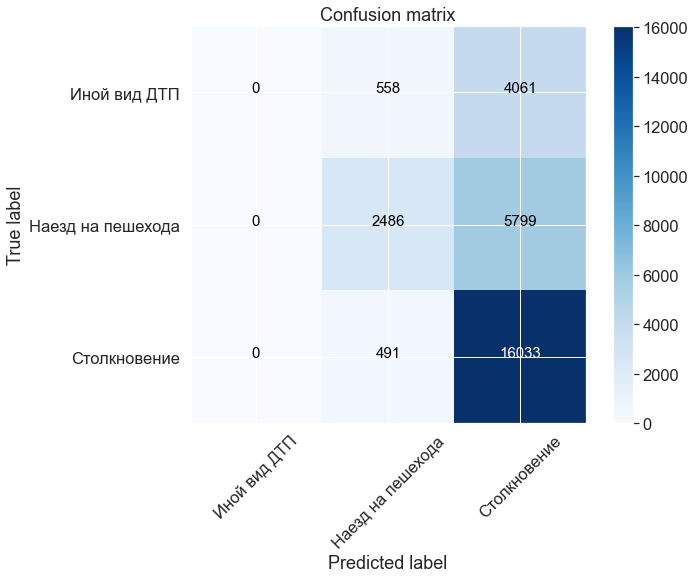

Точность модели составляет : 62.92986271578089


In [108]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Обучаем модель LinearSVC на данных ДТП 2017 года

In [109]:
dfl = df[df['date'].dt.year == 2017]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)

C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

# Тестируем модель (17) на данных ДТП 2017 года

[[    0   643  4525]
 [    0  3628  6949]
 [    0   548 17571]]


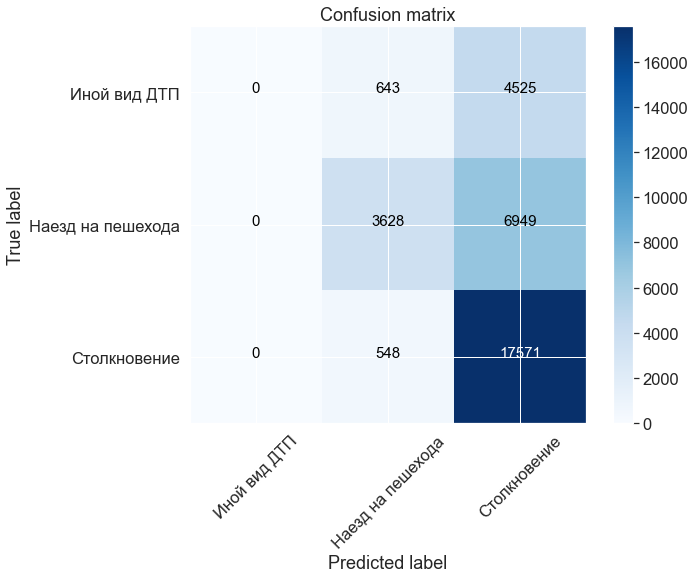

Точность модели составляет : 62.600401606425706


In [110]:
y_pred = svclassifier.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Тестируем модель (17) на данных ДТП 2018 года

[[    0   772  4338]
 [    0  3135  6551]
 [    0   612 18201]]


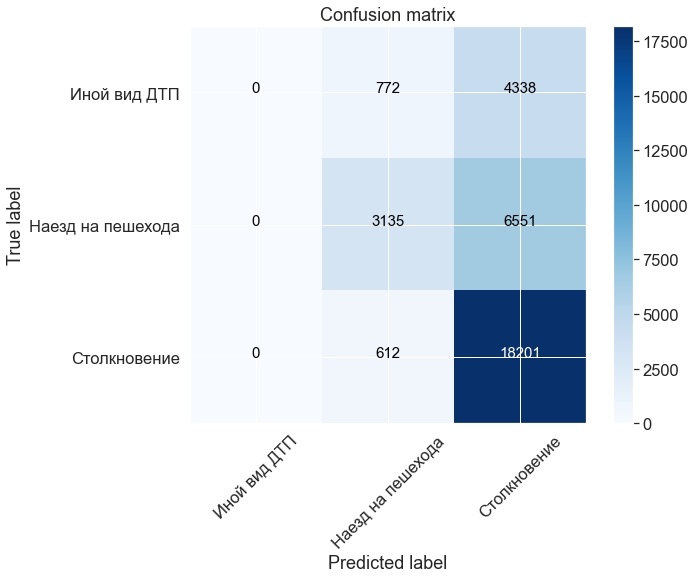

Точность модели составляет : 63.48299562617156


In [111]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Тестируем модель (17) на данных ДТП 2019 года

[[    0   504  4140]
 [    0  2564  5748]
 [    0   460 16012]]


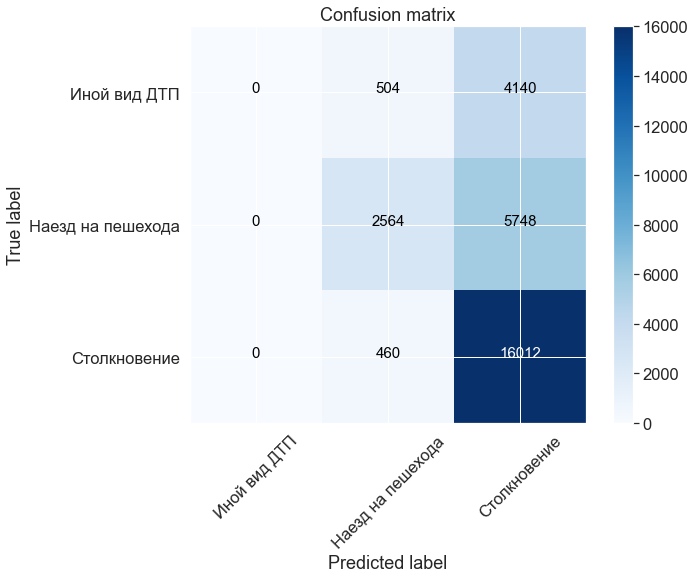

Точность модели составляет : 63.12355579719995


In [112]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Обучаем модель LinearSVC на данных ДТП 2018 года

In [113]:
dfl = df[df['date'].dt.year == 2018]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)

C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

# Тестируем модель (18) на данных ДТП 2018 года

[[    0   811  4430]
 [    0  3180  6745]
 [    0   592 17851]]


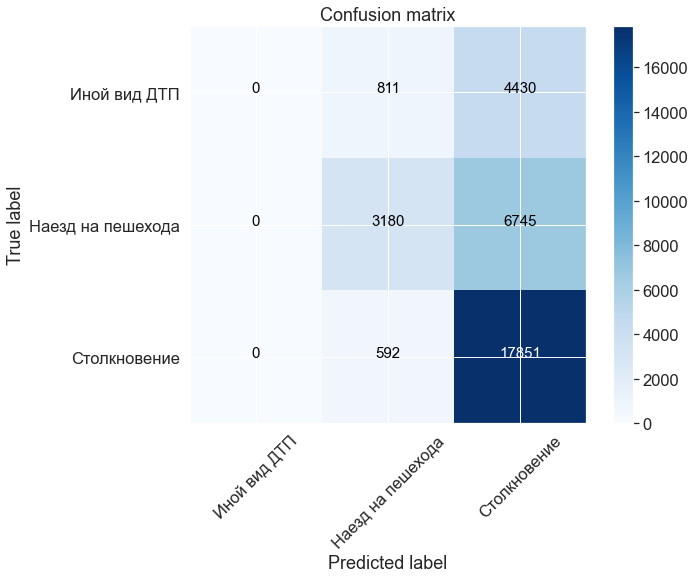

Точность модели составляет : 62.57550060995567


In [114]:
y_pred = svclassifier.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Тестируем модель (18) на данных ДТП 2019 года

[[    0   606  4091]
 [    0  2509  5805]
 [    0   476 15941]]


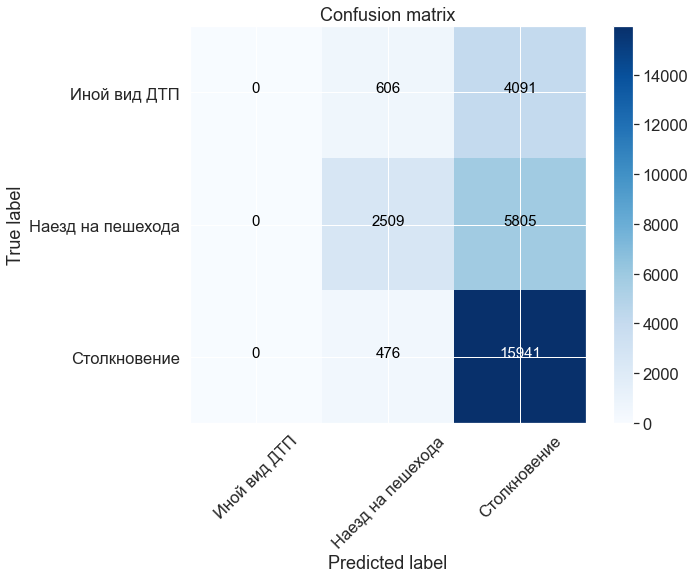

Точность модели составляет : 62.695392143536765


In [115]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.2)
y_pred = svclassifier.predict(X1_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y1_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y1_test,y_pred)*100)

# Обучаем модель LinearSVC на данных ДТП 2019 года и тестируем на 2019 год

C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[    0   550  4080]
 [    0  2505  5788]
 [    0   481 16024]]


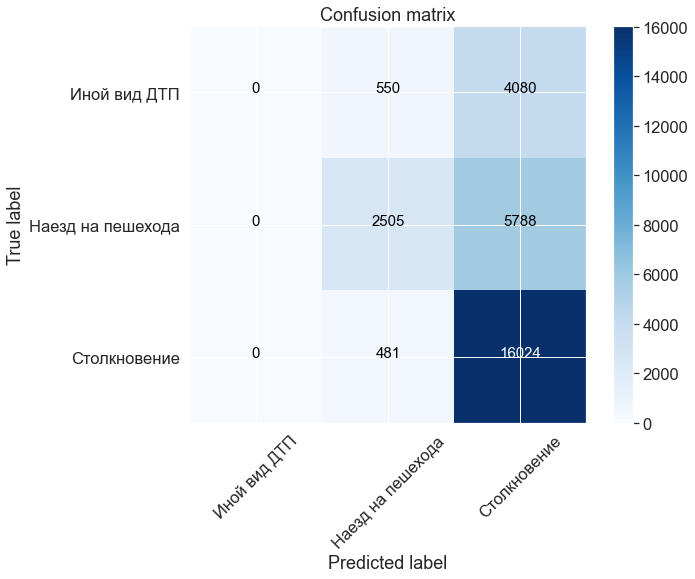

Точность модели составляет : 62.963843958135115


In [116]:
dfl = df[df['date'].dt.year == 2019]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

print('Точность модели составляет :',accuracy_score(y_test,y_pred)*100)

# Лучший показатель точности имеет модель, обученная на данных 2017 года, протестированная на 2018 году 63.4% 

# Оценка важности каждого атрибута 

## Смотрим на показатели модели, включающей все атрибуты

In [59]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)

C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [60]:
from sklearn.metrics import accuracy_score
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f = accuracy_score(y_test,y_pred)*100

[[    0   655  5144]
 [    0  4291  7171]
 [    0   562 18958]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5799
Наезд на пешехода       0.78      0.37      0.51     11462
     Столкновение       0.61      0.97      0.75     19520

         accuracy                           0.63     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.56      0.63      0.55     36781

63.20926565346239


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Точность модели, включающей все переменные составляет 63,546%

## Оцениваем параметр Освещение

In [61]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       #'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

[[    0   675  5159]
 [    0  4354  7163]
 [    0   561 18869]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5834
Наезд на пешехода       0.78      0.38      0.51     11517
     Столкновение       0.60      0.97      0.75     19430

         accuracy                           0.63     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.56      0.63      0.55     36781

63.13857698268127
Потеря точности составляет: 0.07068867078111651


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

## Потеря точности составила 0.07%

## Оцениваем параметр Алкогольное опьянение

In [62]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       #'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

[[    0   643  5208]
 [    0  4266  7182]
 [    0   553 18929]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5851
Наезд на пешехода       0.78      0.37      0.50     11448
     Столкновение       0.60      0.97      0.75     19482

         accuracy                           0.63     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.56      0.63      0.55     36781

63.06245072184008
Потеря точности составляет: 0.14681493162230908


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

## Потеря точности составила 0.15%

## Оцениваем параметр Состояние дорожного полотна

In [63]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[[#'s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

[[    0   612  5125]
 [    0  4355  7126]
 [    0   582 18981]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5737
Наезд на пешехода       0.78      0.38      0.51     11481
     Столкновение       0.61      0.97      0.75     19563

         accuracy                           0.63     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.57      0.63      0.56     36781

63.445800821076105
Потеря точности составляет: -0.23653516761371662


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

## Точность улучшилась на 0.24%

## Оцениваем параметр Изменение режима движения

In [64]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       #'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

[[    0   621  5191]
 [    0  4250  7253]
 [    0   558 18908]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5812
Наезд на пешехода       0.78      0.37      0.50     11503
     Столкновение       0.60      0.97      0.74     19466

         accuracy                           0.63     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.56      0.63      0.55     36781

62.9618553057285
Потеря точности составляет: 0.24741034773389003


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

## Потеря точности составила 0.25%

## Оцениваем параметр Участие лиц женского пола в ДТП

In [65]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       #'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

[[    0   659  5076]
 [    0  4263  6987]
 [    0   548 19248]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5735
Наезд на пешехода       0.78      0.38      0.51     11250
     Столкновение       0.61      0.97      0.75     19796

         accuracy                           0.64     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.57      0.64      0.56     36781

63.921589951333566
Потеря точности составляет: -0.7123242978711772


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

## Точность улучшилась на 0.71%

## Оцениваем параметр Состояние метеусловий

In [67]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       #'pogoda',
       'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

[[    0   663  5147]
 [    0  4362  7140]
 [    0   575 18894]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5810
Наезд на пешехода       0.78      0.38      0.51     11502
     Столкновение       0.61      0.97      0.75     19469

         accuracy                           0.63     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.56      0.63      0.55     36781

63.22829721867268
Потеря точности составляет: -0.019031565210291035


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

## Точность улучшилась на 0.01%

## Оцениваем параметр Фактор нарушения ПДД

In [76]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       #'driver_narush',
       'alco',
       'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

[[    0  1130  4637]
 [    0  2560  8895]
 [    0  1980 17579]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5767
Наезд на пешехода       0.45      0.22      0.30     11455
     Столкновение       0.57      0.90      0.69     19559

         accuracy                           0.55     36781
        macro avg       0.34      0.37      0.33     36781
     weighted avg       0.44      0.55      0.46     36781

54.75381311002964
Потеря точности составляет: 8.455452543432749


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

## Потеря точности составила 8.4%

## Оцениваем параметр Последствия ДТП

In [69]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       #'posled',
       'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

[[    0   631  5152]
 [    0  4300  7207]
 [    0   546 18945]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5783
Наезд на пешехода       0.79      0.37      0.51     11507
     Столкновение       0.61      0.97      0.75     19491

         accuracy                           0.63     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.57      0.63      0.55     36781

63.198390473342215
Потеря точности составляет: 0.010875180120173411


## Потеря точности составила 0.01%

## Оцениваем параметр Объект дорожной сети

In [72]:
dfl = df[df['date'].dt.year == 2015]
X = dfl[['s_pch',
       'osv',
       'change_org_motion',
       'woman_drv',
       'pogoda',
       'driver_narush',
       'alco',
       'posled']]
       #'sdor']]
Y = dfl['dtp_v']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['Иной вид ДТП', 'Наезд на пешехода', 'Столкновение']))
print(accuracy_score(y_test,y_pred)*100)
f1 = accuracy_score(y_test,y_pred)*100
fc = f-f1
print ('Потеря точности составляет:', fc )

[[    0   660  5174]
 [    0  4300  7225]
 [    0   556 18866]]
                   precision    recall  f1-score   support

     Иной вид ДТП       0.00      0.00      0.00      5834
Наезд на пешехода       0.78      0.37      0.50     11525
     Столкновение       0.60      0.97      0.74     19422

         accuracy                           0.63     36781
        macro avg       0.46      0.45      0.42     36781
     weighted avg       0.56      0.63      0.55     36781

62.983605665968845
Потеря точности составляет: 0.2256599874935432


C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimasyan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Потеря точности составила 0.22%

# Изобразим оценку важности атрибутов на диаграмме

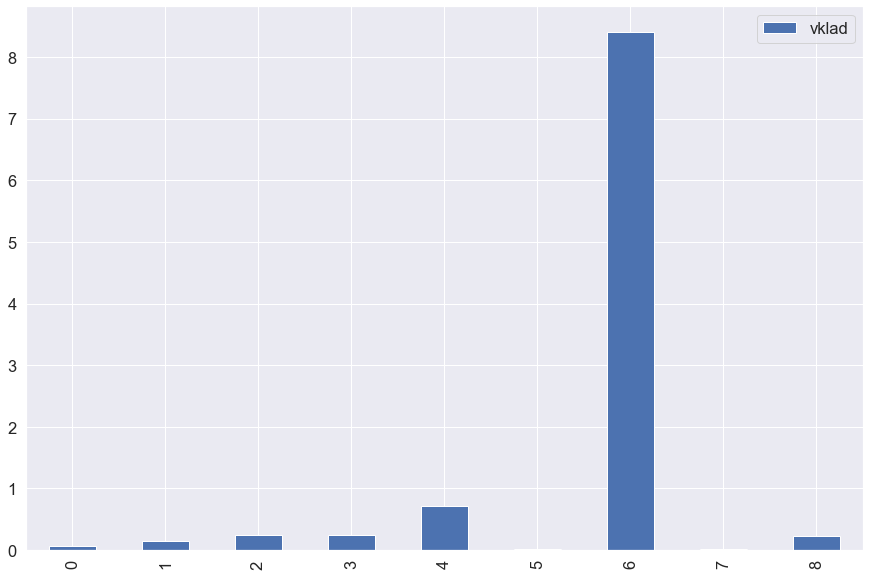

In [86]:
per.plot.bar(figsize=(15, 10))

## Выявлено 3 атрибута, которые максимально важны для модели LinearSVC() - Фактор нарушения ПДД, Участие лиц женского пола за рулем ТС в ДТП, Изменение режима движения.

# Вывод по модели LinearSVC()

## Значение "Иные ДТП" полностью были распределены по двум другим классам. То есть как отдельный класс они не определяются. Тем более, что под значением "Иные ДТП" понимаются много разных классов. И вообще в значение "Иные ДТП" ничего не попало.

## Линейное разделение показывает неудовлетворительный результат (63 процента разделения по классам)
## Точность модели практически не меняется в зависимости от того, на данных какого года она была обучена и к данным какого года она была применена.
## Следовательно, можно сделать вывод о том, что исходный набор данных является объективным. Распраделение по вкладу параметров в модель практически не меняется.